<a href="https://colab.research.google.com/github/goodmorninc-md/CVprojects/blob/main/Pytorch03_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [67]:
from sklearn.datasets import make_circles

In [68]:
n_samples = 1000
#random_state为可复现性
X,y = make_circles(n_samples,noise = 0.03,random_state = 666)
print(len(X))
print(len(y))

1000
1000


In [69]:
X[:10],y[:10]

(array([[ 0.52325328,  0.61300511],
        [ 0.55902611, -0.79380798],
        [ 0.0727995 ,  1.01580096],
        [ 0.64397546,  0.47924582],
        [ 0.72775059, -0.33061163],
        [ 0.81142124, -0.59478038],
        [-0.92285668, -0.31323881],
        [ 0.82111644, -0.52126486],
        [-0.86263646,  0.05297522],
        [-0.78689026,  0.10441673]]),
 array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1]))

In [70]:
import pandas as pd
circles = pd.DataFrame({"X1":X [:,0],"X2":X[:,1],"label":y})
circles.head(10)

,X1,X2,label
0,0.523253,0.613005,1
1,0.559026,-0.793808,0
2,0.072800,1.015801,0
3,0.643975,0.479246,1
4,0.727751,-0.330612,1
5,0.811421,-0.594780,0
6,-0.922857,-0.313239,0
7,0.821116,-0.521265,0
8,-0.862636,0.052975,1
9,-0.786890,0.104417,1


In [71]:
circles.label.value_counts()

1    500
0    500
Name: label, dtype: int64

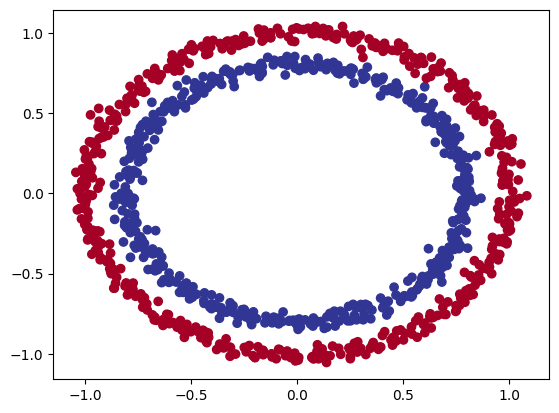

In [72]:
import matplotlib.pyplot as plt
plt.scatter(x=X[:,0],y=X[:,1],c=y,cmap = plt.cm.RdYlBu)

In [73]:
import torch
#numpy 和 tensor默认精度可能不一样，要转成一样的精度
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)
#这里x和y就是tensor了
X,y

(tensor([[ 0.5233,  0.6130],
         [ 0.5590, -0.7938],
         [ 0.0728,  1.0158],
         ...,
         [ 0.6323, -0.8384],
         [ 0.1728, -0.7774],
         [-1.0002,  0.1315]]),
 tensor([1., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
         0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 0., 0., 0., 1.,
         1., 0., 1., 0., 1., 0., 0., 0., 1., 1., 1., 0., 1., 1., 1., 1., 0., 0.,
         1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1.,
         1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 0., 0., 1.,
         1., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1.,
         1., 1., 0., 1., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 0., 1., 0., 0., 0., 1.,
         1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 1.,
         1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1.,


In [74]:
from sklearn.model_selection import train_test_split

In [75]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 666)
len(X_test)

200

#建立分类模型


In [76]:
from torch import nn
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [77]:
class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()
    #全连接层,因为x有两个列，是两个输入的特征
    self.layer_1 = nn.Linear(in_features = 2,out_features = 5)
    self.layer_2 = nn.Linear(in_features = 5,out_features= 1)
    #重新定义了层，线性整流函数
    #正数保留，负数变0 ，使得两层之间有弧度
    self.relu = nn.ReLU()
  # Y = WX(WX+B) +B
  #还是线性的
  def forward(self,x):
    #layer_1出来进去layer_2
    return self.layer_2(self.relu(self.layer_1(x)))

In [78]:
#to(devide)不管有没有GPU都可以运行
model_0 = CircleModelV0().to(device)
model_0.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[ 0.0397, -0.1405],
                      [ 0.6362,  0.3636],
                      [-0.2153,  0.3460],
                      [ 0.5180, -0.4351],
                      [-0.1212, -0.6256]])),
             ('layer_1.bias',
              tensor([ 0.0560,  0.2632, -0.0484, -0.4397,  0.3711])),
             ('layer_2.weight',
              tensor([[ 0.0185,  0.4164,  0.0522,  0.1595, -0.2398]])),
             ('layer_2.bias', tensor([0.3631]))])

In [79]:
untrained_preds = model_0(X_test.to(device))
untrained_preds[:10]

tensor([[0.2037],
        [0.4518],
        [0.6920],
        [0.6849],
        [0.7852],
        [0.4559],
        [0.4994],
        [0.3120],
        [0.6797],
        [0.5459]], grad_fn=<SliceBackward0>)

In [80]:
y_test[:10]

tensor([1., 1., 0., 0., 0., 0., 0., 1., 0., 0.])

In [81]:
# torch.nn.BCELoss()
#逻辑斯蒂回归
loss_fn = torch.nn.BCEWithLogitsLoss()
optimizer= torch.optim.SGD(params = model_0.parameters(),lr=0.5)
#sigmoid = 1/(1+e^(-x))

In [82]:
y_logits = model_0(X_test.to(device))
y_pred_prob = torch.sigmoid(y_logits)
#模型预测到的概率在0.5附近，则说明模型预测值不准
y_pred_prob

tensor([[0.5507],
        [0.6111],
        [0.6664],
        [0.6648],
        [0.6868],
        [0.6120],
        [0.6223],
        [0.5774],
        [0.6637],
        [0.6332],
        [0.5636],
        [0.6160],
        [0.6168],
        [0.5661],
        [0.5317],
        [0.6723],
        [0.6053],
        [0.5406],
        [0.5630],
        [0.6724],
        [0.6740],
        [0.5721],
        [0.6462],
        [0.6665],
        [0.5437],
        [0.6587],
        [0.6528],
        [0.5380],
        [0.6689],
        [0.5390],
        [0.6666],
        [0.6333],
        [0.6060],
        [0.6858],
        [0.5562],
        [0.6398],
        [0.5384],
        [0.6672],
        [0.5354],
        [0.5412],
        [0.5313],
        [0.6608],
        [0.5693],
        [0.6212],
        [0.5733],
        [0.6309],
        [0.5641],
        [0.6681],
        [0.5373],
        [0.5539],
        [0.5736],
        [0.5514],
        [0.6464],
        [0.5851],
        [0.5390],
        [0

In [83]:
#压缩到01之间
y_pred_labels = torch.round(y_pred_prob)
#因为这里要预测正确率，而当前形状不一样，所以要squeeze一下
y_pred_labels.shape,y_test.shape


(torch.Size([200, 1]), torch.Size([200]))

In [84]:
y_pred_labels = y_pred_labels.squeeze()
y_pred_labels.shape,y_test.shape

(torch.Size([200]), torch.Size([200]))

In [85]:
#y_pred_labels仅有200个数据
torch.sum(y_pred_labels == y_test)

tensor(93)

In [86]:
def accuracy_fn(y_true,y_pred):
  correct = torch.sum(y_true == y_pred).item()

  acc = (correct/len(y_true)) *100
  return acc

In [87]:
torch.manual_seed(666)
#开始训练
X_train,y_train = X_train.to(device),y_train.to(device)
X_test,y_test = X_test.to(device),y_test.to(device)

epochs = 200
for epoch in range(epochs):
  model_0.train()
  y_logits = model_0(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  loss= loss_fn(y_logits,y_train)
  acc = accuracy_fn(y_train,y_pred)

  optimizer.zero_grad()

  loss.backward()
  optimizer.step()
  model_0.eval()

  with torch.inference_mode():
    test_logits = model_0(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    test_loss = loss_fn(test_logits,y_test)
    test_acc = accuracy_fn(y_test,test_pred)
  print(f"{epoch} | Loss:{loss} | acc:{acc} | Test Loss:{test_loss} | Test Acc:{test_acc}")

0 | Loss:0.7212522625923157 | acc:50.875 | Test Loss:0.7319015264511108 | Test Acc:46.5
1 | Loss:0.7142159938812256 | acc:50.875 | Test Loss:0.7238346934318542 | Test Acc:46.5
2 | Loss:0.7093379497528076 | acc:51.0 | Test Loss:0.7178401350975037 | Test Acc:54.50000000000001
3 | Loss:0.7059174180030823 | acc:57.62500000000001 | Test Loss:0.7133151888847351 | Test Acc:49.5
4 | Loss:0.7034843564033508 | acc:53.5 | Test Loss:0.7098385691642761 | Test Acc:51.0
5 | Loss:0.7017149925231934 | acc:52.0 | Test Loss:0.7071287035942078 | Test Acc:50.5
6 | Loss:0.7003983855247498 | acc:51.74999999999999 | Test Loss:0.7049756646156311 | Test Acc:50.0
7 | Loss:0.6993879675865173 | acc:50.74999999999999 | Test Loss:0.7032405138015747 | Test Acc:50.0
8 | Loss:0.6985895037651062 | acc:50.375 | Test Loss:0.7018193006515503 | Test Acc:50.0
9 | Loss:0.697938859462738 | acc:51.0 | Test Loss:0.7006394863128662 | Test Acc:50.0
10 | Loss:0.6973944306373596 | acc:50.125 | Test Loss:0.699647068977356 | Test Acc:

##之前都是二分类->多分类

分类ABC任务
假设 A 40% B30% c30%
A |BC
创建一个新的数据集

In [88]:
import torch
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
X_blob,y_blob = make_blobs(n_samples=1000,
                n_features = 2,
                centers = 4,
                cluster_std = 1.5,
                random_state=666)  #类似与noise


In [89]:
X_blob,type(X_blob)

(array([[ 7.96736491, -8.02583739],
        [ 0.66018071, -8.05817757],
        [-3.37399407, -9.92186768],
        ...,
        [ 8.99526041, -8.6239454 ],
        [ 8.14596553, -9.15587334],
        [ 2.41258313,  4.00305874]]),
 numpy.ndarray)

1.确认需求
2.Google一下
3.按例子模仿
4.根据需求调整模型（函数）参数

In [90]:
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)
X_blob,y_blob

(tensor([[ 7.9674, -8.0258],
         [ 0.6602, -8.0582],
         [-3.3740, -9.9219],
         ...,
         [ 8.9953, -8.6239],
         [ 8.1460, -9.1559],
         [ 2.4126,  4.0031]]),
 tensor([2, 3, 3, 3, 2, 1, 0, 3, 1, 2, 2, 1, 2, 1, 2, 2, 2, 3, 3, 2, 2, 2, 0, 2,
         3, 3, 2, 1, 1, 1, 3, 3, 1, 1, 2, 0, 0, 3, 1, 3, 0, 3, 0, 1, 1, 3, 3, 2,
         2, 3, 1, 0, 2, 1, 3, 0, 3, 2, 2, 2, 1, 2, 0, 0, 2, 1, 3, 1, 1, 2, 2, 1,
         3, 3, 1, 2, 3, 0, 3, 3, 3, 3, 3, 0, 1, 2, 0, 0, 0, 1, 0, 2, 0, 3, 3, 1,
         3, 1, 3, 3, 2, 3, 0, 0, 3, 1, 1, 1, 0, 1, 2, 3, 3, 0, 0, 2, 0, 2, 0, 2,
         0, 2, 0, 0, 0, 0, 3, 3, 3, 1, 2, 1, 3, 3, 1, 2, 3, 3, 3, 3, 3, 1, 3, 3,
         1, 1, 1, 0, 1, 2, 1, 1, 1, 1, 2, 2, 0, 1, 3, 1, 3, 1, 2, 0, 0, 2, 1, 2,
         2, 0, 1, 1, 0, 1, 1, 3, 3, 1, 0, 2, 3, 2, 3, 0, 3, 0, 3, 0, 1, 3, 3, 1,
         2, 1, 2, 2, 3, 1, 0, 1, 1, 3, 3, 0, 2, 0, 3, 0, 0, 1, 0, 1, 0, 0, 3, 0,
         0, 2, 2, 0, 1, 3, 1, 0, 2, 2, 2, 1, 3, 1, 3, 2, 0, 2, 2, 1, 2, 2, 0, 2,


In [91]:
X_blob_train,X_blob_test,y_blob_train,y_blob_test = train_test_split(X_blob,y_blob,test_size = 0.2,random_state = 888)

In [92]:
plt.figure(figsize =(10,7))

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

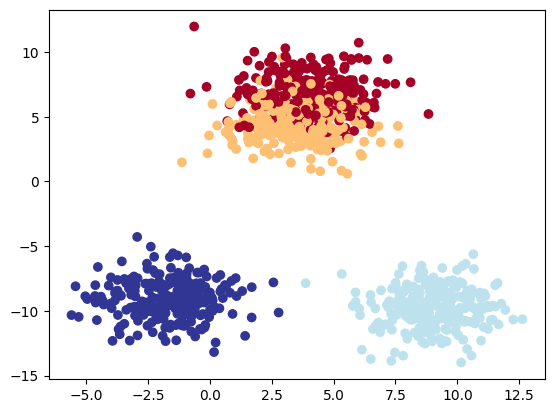

In [93]:
plt.scatter(X_blob[:,0],X_blob[:,1],c=y_blob,cmap = plt.cm.RdYlBu)

In [94]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [95]:
from torch import nn


In [96]:
class BlobModel(nn.Module):
  def __init__(self,input_features,output_features,hidden_units = 8):
    super().__init__()
    self.linear_layer_stack = nn.Sequential(
        nn.Linear(in_features = input_features,out_features = hidden_units),
        nn.ReLU(),
        nn.Linear(in_features = hidden_units,out_features = output_features)
    )
  def forward(self,x):
    return self.linear_layer_stack(x)

In [97]:
model_multiclass = BlobModel(input_features = 2,output_features = 4).to(device)
model_multiclass

BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [98]:
model_multiclass(X_blob_train.to(device))

tensor([[-1.2436, -0.8773,  0.0390, -0.8195],
        [-1.8011, -1.2469,  0.1382, -1.2361],
        [-3.0294,  0.6043, -3.7531, -0.8735],
        ...,
        [-2.3263, -1.9522,  0.1121, -1.7034],
        [-5.5397,  0.1403, -4.7749, -1.8958],
        [-2.2580, -1.8852,  0.1072, -1.6478]], grad_fn=<AddmmBackward0>)

In [99]:
y_logits = model_multiclass(X_blob_test.to(device))
# y_logits.shape
y_pred_probs = torch.softmax(y_logits,dim=1)
# XXXX
# XXXX
# XXXX
# XXXX  竖的维度为0，横的维度是1，而要对横着的各个特征做分类
y_logits.shape

torch.Size([200, 4])

In [100]:
y_pred_probs = torch.softmax(y_logits,dim=1)

In [ ]:
print(y_pred_probs)
print(torch.argmax(y_pred_probs,dim = 1))

In [102]:
torch.manual_seed(6666)
epochs=  500
X_blob_train, y_blob_train, X_blob_test, y_blob_test = X_blob_train.to(device), y_blob_train.to(device), X_blob_test.to(device), y_blob_test.to(device)

In [103]:
loss_fn = nn.CrossEntropyLoss() #适用于分类的损失,交叉熵损失
optimizer = torch.optim.SGD(model_multiclass.parameters(),lr = 0.1)


In [105]:
for epoch in range(epochs):


  model_multiclass.train()
  #1.forward
  y_logits = model_multiclass(X_blob_train)
  y_pred = torch.softmax(y_logits,dim=1).argmax(dim=1)

  #2.loss and acc
  #CrossEntropyLoss()输入不需要归一化，
  loss= loss_fn(y_logits,y_blob_train)
  acc = accuracy_fn(y_true = y_blob_train,y_pred = y_pred)

  #3
  optimizer.zero_grad()
  #4
  loss.backward()
  #5
  optimizer.step()
  model_multiclass.eval()
  with torch.inference_mode():
    test_logits = model_multiclass(X_blob_test)
    test_pred = torch.softmax(test_logits, dim = 1).argmax(dim = 1)
    test_loss = loss_fn(test_logits, y_blob_test)
    test_acc = accuracy_fn(y_true = y_blob_test, y_pred = test_pred)

    print(f"Epoch:{epoch}| Loss:{loss:.4f}, Acc:{acc:.2f}% | Test Loss:{test_loss:.4f}, Test acc:{test_acc:.2f}%")


Epoch:0| Loss:2.5615, Acc:0.00% | Test Loss:0.9787, Test acc:33.50%
Epoch:1| Loss:1.0220, Acc:31.00% | Test Loss:0.6640, Test acc:73.50%
Epoch:2| Loss:0.7161, Acc:67.88% | Test Loss:0.5723, Test acc:77.00%
Epoch:3| Loss:0.6120, Acc:74.75% | Test Loss:0.5159, Test acc:78.00%
Epoch:4| Loss:0.5522, Acc:74.75% | Test Loss:0.4774, Test acc:78.00%
Epoch:5| Loss:0.5114, Acc:75.00% | Test Loss:0.4493, Test acc:78.00%
Epoch:6| Loss:0.4820, Acc:75.25% | Test Loss:0.4279, Test acc:78.00%
Epoch:7| Loss:0.4598, Acc:75.38% | Test Loss:0.4112, Test acc:78.00%
Epoch:8| Loss:0.4426, Acc:75.50% | Test Loss:0.3978, Test acc:79.00%
Epoch:9| Loss:0.4291, Acc:75.75% | Test Loss:0.3869, Test acc:79.00%
Epoch:10| Loss:0.4181, Acc:76.12% | Test Loss:0.3778, Test acc:79.50%
Epoch:11| Loss:0.4090, Acc:76.88% | Test Loss:0.3701, Test acc:80.50%
Epoch:12| Loss:0.4015, Acc:77.50% | Test Loss:0.3636, Test acc:80.50%
Epoch:13| Loss:0.3951, Acc:77.75% | Test Loss:0.3579, Test acc:80.50%
Epoch:14| Loss:0.3896, Acc:78.0